# Time Series Analysis
---

Time series is a sequence of observation within a time period. It is a sequence of data points, measured typically at successive time points spaced at uniform time intervals. Examples of time series are the daily closing value of the Dow Jones index or the annual flow volume of the Nile River at Aswan. Time series analysis comprises methods for analyzing time series data in order to extract meaningful statistics and other characteristics of the data. Time series forecasting is the use of a model to predict future values based on previously observed values.

Types of Anlaysis:
- Multivariate
- Univariate



## Time Series Forecasting
- Specific case of Supervised Learning problem where X = time and y = value at time X
- Univariate
- Predicting values based on previously observed values for a given time period


Data Pattern for time series:
1. Random , no identifiable pattern
2. Trend , long term increase or decrease in the data
3. Seasonal, distinct repeating pattern at fixed intervals (weekly, monthly, yearly)
4. Cyclical , a distinct repeating pattern at non-fixed intervals (business cycle, recession, expansion)

Method for forecasting
- AR-I-MA (Auto Regressive Integrated Moving Average)
- S-AR-I-MA (Seasonal Auto Regressive Integrated Moving Average)

Exogenous Variables: External factors that affect the time series, (cth: lebaran, musim hujan), karena ngga pasti tanggalnya makanya kita harus input sendiri; maka cuma bisa pakai regression model

**Stationarity**

- pola data yg bergerak sekitar rata2, dan tidak memiliki variansi yang besar
- stationary is a statistical assumption that a time series has:
    - constant mean
    - constant variance
    - autocovariance that does not depend on time
- the data should be stationary before applying ARIMA model

Test for Stationarity:
- Augmented Dickey Fuller Test

### ARIMA

- ARIMA stands for Auto Regressive Integrated Moving Average
- Use older observation as features to predict future values
- ARIMA is a combination of 3 parts:
    - AR (Auto Regressive) 
    - I (Integrated)
    - MA (Moving Average)

    
e.g:
- ARIMA(1,1,1) --> AR(1) + I(1) + MA(1)
- ARIMA(1,0,0) --> AR(1) 



Hyperparameter of ARIMA:
- p : AR model lags, How many previous values do we want to use to predict the next value
- d : how many differencing needed for I=0, Adjust stationarity
- q : MA model lags, avoid correlated error (autocorrelation)

Before applying ARIMA:
- If the data is stationary, I (d) = 0
- If the data is not stationary --> we need to make it stationary by differencing
- Determine I by differencing

We can use ACF-PACF to determine the best combination of p,d,q.
- ACF (AutoCorrelation Function) Graph for determining MA
    - Tails off -> MA = 0
    - Cuts off -> MA = where it cuts off / lag
- PACF (Partial-AutoCorrelation Function) Graph for determining AR
    - Tails off -> AR = 0
    - Cuts off -> AR = where it cuts off / lag

In [2]:
#Library

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from statsmodels.api import OLS

In [4]:
#Load Data
df = pd.read_csv('/Users/Dwika/My Projects/DATASETS/shampo_sales.csv')
df.head()

,Month,Sales
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,119.3
4,1-05,180.3


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Month   36 non-null     object 
 1   Sales   36 non-null     float64
dtypes: float64(1), object(1)
memory usage: 708.0+ bytes


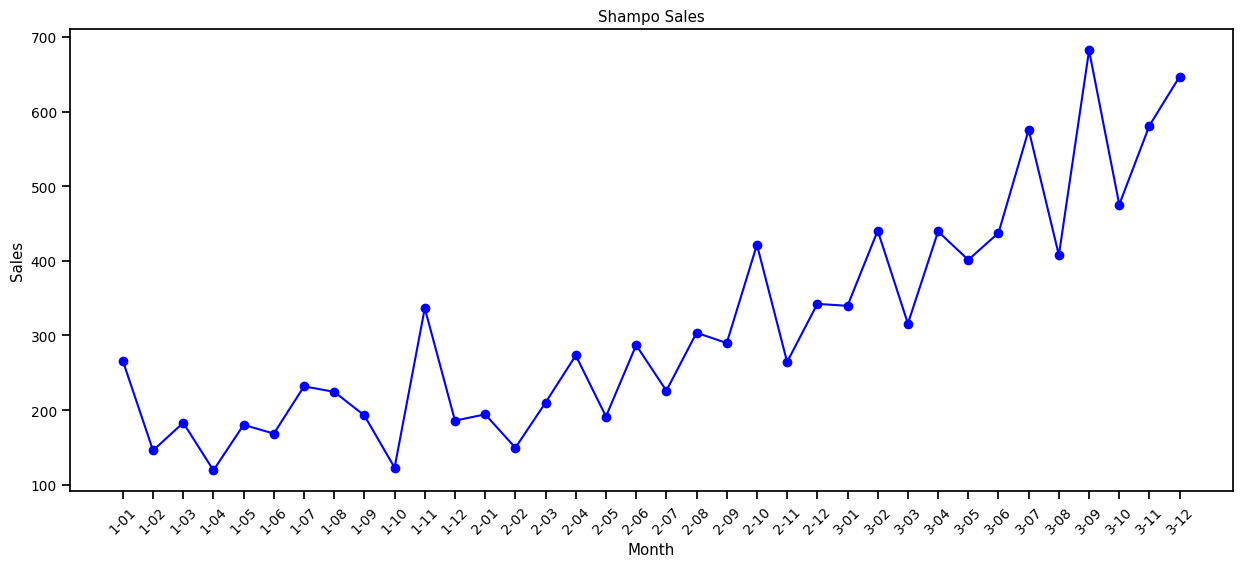

In [18]:
#Initial Plot


plt.figure(figsize=(15,6))

#Scaling the data
sns.set_context(context='notebook', font_scale=0.9)

plt.plot(df['Month'], df['Sales'], marker='o', color='blue', linestyle='-')
plt.title('Shampo Sales')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.ylabel('Sales')
plt.show()

> From the plot, we can infer the pattern is upward trend

### Stationarity Check

In [19]:
#Stationary Check - ADF Test
def adf_test(series):
    result = adfuller(series)
    print('ADF Statistic: {}'.format(result[0]))
    print('p-value: {}'.format(result[1]))
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t{}: {}'.format(key, value))
        
adf_test(df['Sales'])


ADF Statistic: 3.0601420836411806
p-value: 1.0
Critical Values:
	1%: -3.7238633119999998
	5%: -2.98648896
	10%: -2.6328004


In [24]:
adf = adfuller(df['Sales'])
adf

(3.0601420836411806,
 1.0,
 10,
 25,
 {'1%': -3.7238633119999998, '5%': -2.98648896, '10%': -2.6328004},
 278.9972644263031)

In [23]:

if adf[1] < 0.05:
    print('Data is Stationary')
else:
    print('Data is Non-Stationary')

Data is Non-Stationary


### Differencing

In [27]:
#Differencing

df['1st diff'] = df['Sales'].diff(1)
df.head()

,Month,Sales,1st diff
0,1-01,266.0,NaN
1,1-02,145.9,-120.1
2,1-03,183.1,37.2
3,1-04,119.3,-63.8
4,1-05,180.3,61.0


In [28]:
#ADF test #2

#Test to 1st diff
adf = adfuller(df['1st diff'].dropna())

if adf[1] < 0.05:
    print('Data is Stationary')
else:
    print('Data is Non-Stationary')


Data is Stationary


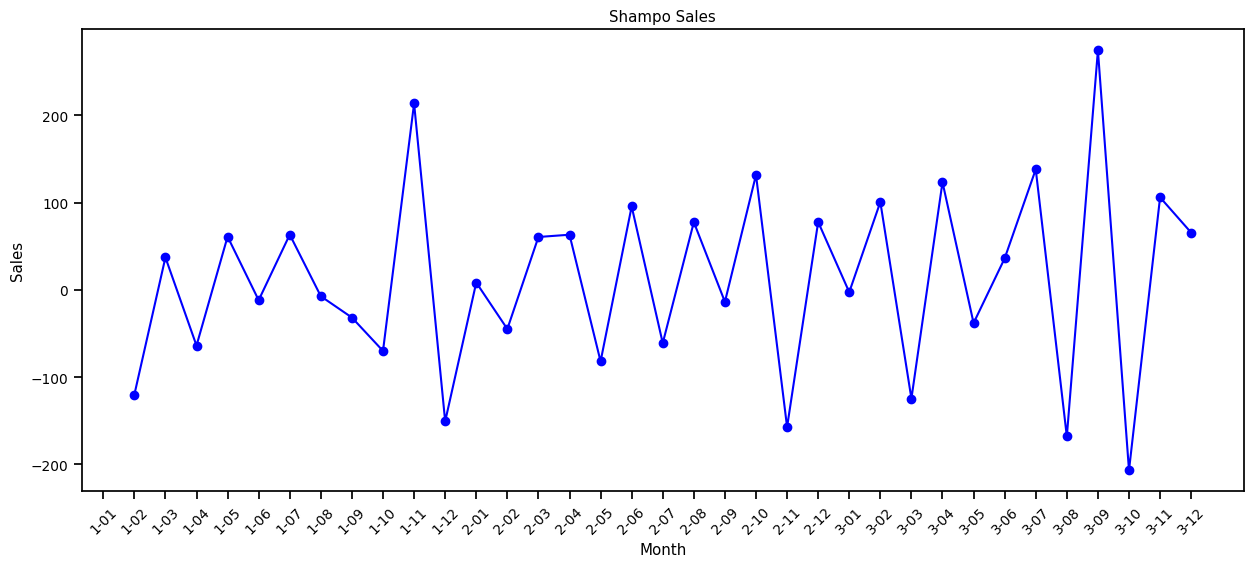

In [30]:
#Plot after differencing #1


plt.figure(figsize=(15,6))
plt.plot(df['Month'], df['1st diff'], marker='o', color='blue', linestyle='-')
plt.title('Shampo Sales')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.ylabel('Sales')
plt.show()

### ACF-PACF

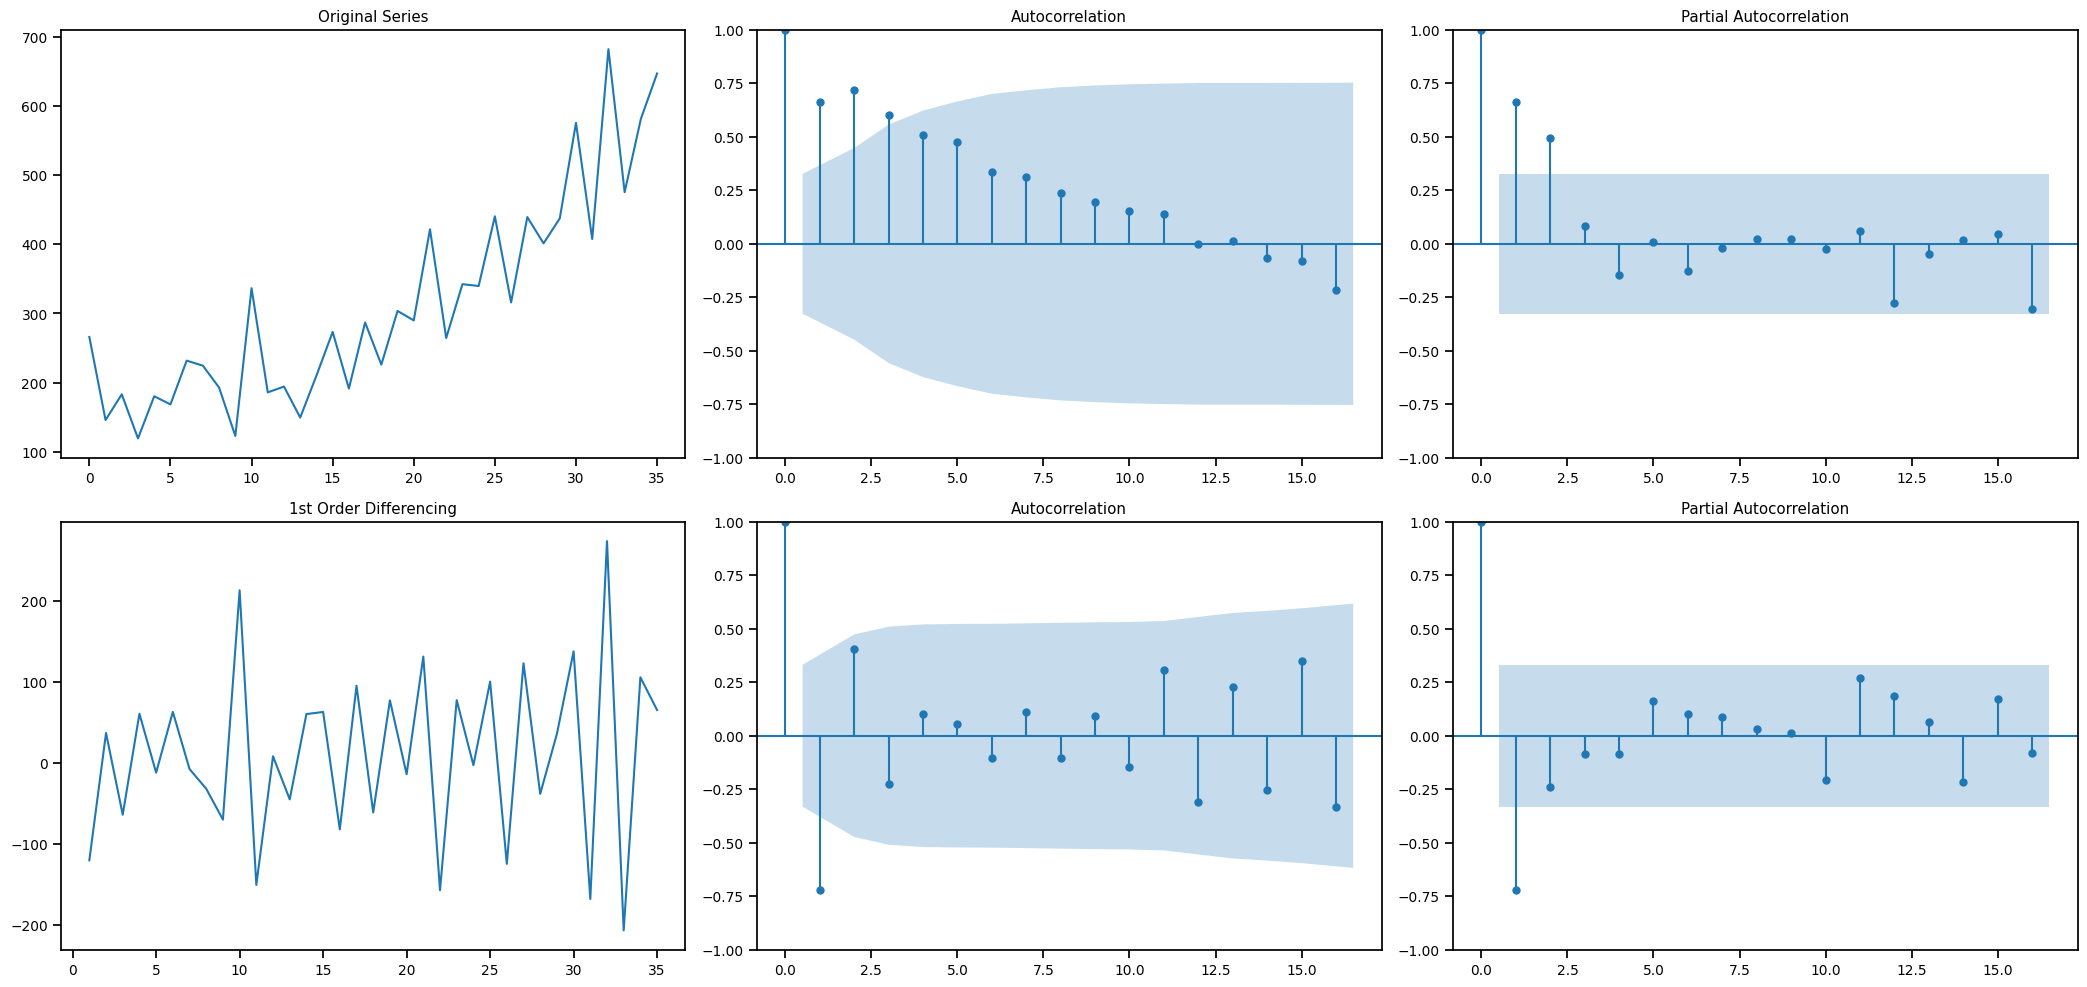

In [47]:
# plot ACF and PACF

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, axes = plt.subplots(2,3, figsize=(21,10))

#Original Series
axes[0,0].plot(df['Sales']); axes[0,0].set_title('Original Series')
plot_acf(df['Sales'], ax=axes[0,1])
plot_pacf(df['Sales'], ax=axes[0,2])

# 1st Differencing
axes[1,0].plot(df['1st diff']); axes[1,0].set_title('1st Order Differencing')
plot_acf(df['1st diff'].dropna(), ax=axes[1,1])
plot_pacf(df['1st diff'].dropna(), ax=axes[1,2])

plt.tight_layout()
plt.show()

Looking at the plot:
- ACF cuts off at 2, MA = 2 **or** Tails off, MA = 0 --> Subjective
- PACF cuts off at lag 2, AR = 2
- I = 1

In [53]:
#ARIMA Model

from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(df['Sales'], order=(2,1,2))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   36
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -199.207
Date:                Tue, 17 Oct 2023   AIC                            408.414
Time:                        11:35:00   BIC                            416.191
Sample:                             0   HQIC                           411.098
                                 - 36                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.5909      0.231     -6.891      0.000      -2.043      -1.138
ar.L2         -0.6726      0.205     -3.287      0.001      -1.074      -0.271
ma.L1          0.7994      2.293      0.349      0.7

- ma.L1 , pvalue < 0.05 --> significant, from our model is not significant
- ma.L2 , pvalue < 0.05 --> significant, from our model is not significant

Then we can use by varying the p,d,q value to get the best model
- ARIMA(2,1,2) --> ARIMA(2,1,1) --> ARIMA(2,1,0)
- ARIMA(2,1,0) --> ARIMA(1,1,0)


Best ARIMA model is ARIMA(1,1,0)

In [54]:

model = ARIMA(df['Sales'], order=(1,1,0))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   36
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -201.287
Date:                Tue, 17 Oct 2023   AIC                            406.575
Time:                        11:36:46   BIC                            409.686
Sample:                             0   HQIC                           407.649
                                 - 36                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7142      0.136     -5.259      0.000      -0.980      -0.448
sigma2      5683.4514   1448.557      3.924      0.000    2844.331    8522.572
Ljung-Box (L1) (Q):                   1.89   Jarque-

In [57]:
#Forecasting

forecast = model_fit.forecast(steps=50)
forecast

36    600.046377
37    633.510736
38    609.609418
39    626.680506
40    614.487788
41    623.196218
42    616.976378
43    621.418787
44    618.245876
45    620.512071
46    618.893482
47    620.049530
48    619.223844
49    619.813575
50    619.392370
51    619.693208
52    619.478340
53    619.631806
54    619.522196
55    619.600483
56    619.544568
57    619.584504
58    619.555980
59    619.576353
60    619.561802
61    619.572195
62    619.564772
63    619.570073
64    619.566287
65    619.568991
66    619.567060
67    619.568439
68    619.567454
69    619.568158
70    619.567655
71    619.568014
72    619.567758
73    619.567941
74    619.567810
75    619.567903
76    619.567837
77    619.567884
78    619.567850
79    619.567875
80    619.567857
81    619.567870
82    619.567861
83    619.567867
84    619.567863
85    619.567866
Name: predicted_mean, dtype: float64

The limit is reached when the number generated is the same